In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
from tensorflow.keras.datasets import mnist

(X_train,y_train),(X_test,y_test)=mnist.load_data()

2023-01-08 01:34:41.333393: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-08 01:34:46.144200: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-08 01:34:46.144288: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-08 01:34:57.777200: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [4]:
print(X_train.shape)
X_train[0]

(60000, 28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

5


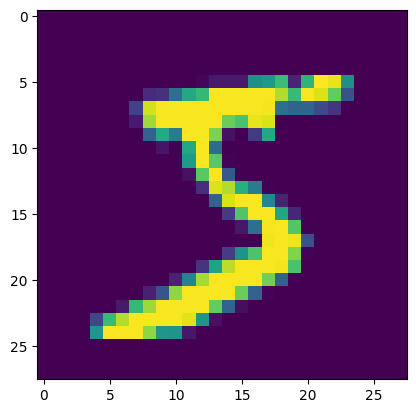

In [5]:
print(y_train[0])
plt.imshow(X_train[0])

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scale = MinMaxScaler()
# X_train_scaled = scale.fit_transform(X_train.reshape(28*28,1))
# X_test_scaled = scale.transform(X_test.reshape(28*28,1))


In [ ]:
# print(X_train_scaled.shape,X_test_scaled.shape)

In [7]:
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard
from tensorflow.keras.regularizers import L2

import tensorboard

# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [20]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=32,activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=128,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=10,activation='softmax'))

In [21]:
loss = SparseCategoricalCrossentropy(from_logits=True)
adam = Adam(learning_rate=0.001, clipvalue=1.0)
model.compile(optimizer=adam,loss=loss,metrics=['accuracy'])

In [22]:
!rm -rf ./logs/
callbacks = [EarlyStopping(patience=5),TensorBoard(log_dir='./logs')]

In [23]:
history = model.fit(x=X_train,y=y_train,epochs=100,
                    validation_split=0.2,callbacks=[callbacks])

Epoch 1/100


2023-01-08 01:46:34.800989: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 [==============================] - 11s 6ms/step - loss: 0.4541 - accuracy: 0.8654 - val_loss: 0.1906 - val_accuracy: 0.9421
Epoch 2/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2345 - accuracy: 0.9332 - val_loss: 0.1556 - val_accuracy: 0.9547
Epoch 3/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1893 - accuracy: 0.9449 - val_loss: 0.1406 - val_accuracy: 0.9609
Epoch 4/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1626 - accuracy: 0.9538 - val_loss: 0.1277 - val_accuracy: 0.9632
Epoch 5/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1455 - accuracy: 0.9578 - val_loss: 0.1252 - val_accuracy: 0.9634
Epoch 6/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1334 - accuracy: 0.9607 - val_loss: 0.1115 - val_accuracy: 0.9688
Epoch 7/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1248 - accuracy: 0.9627 - val_loss: 0.1164 - val_accuracy: 0

In [ ]:
%tensorboard --logdir logs

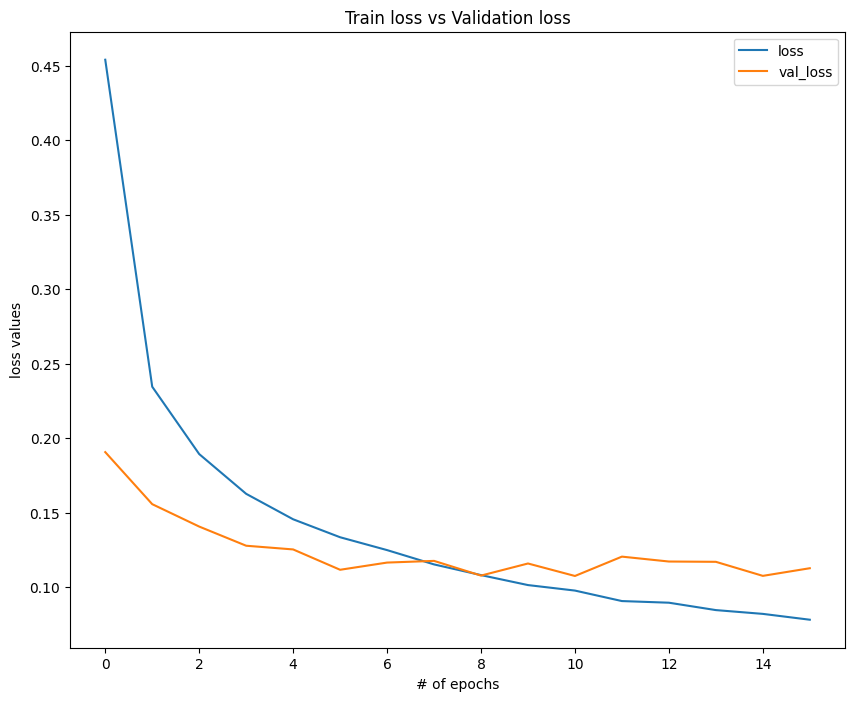

In [24]:
plt.figure(figsize=(10,8))
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.xlabel("# of epochs")
plt.ylabel("loss values")
plt.title("Train loss vs Validation loss")
plt.legend()
plt.show()

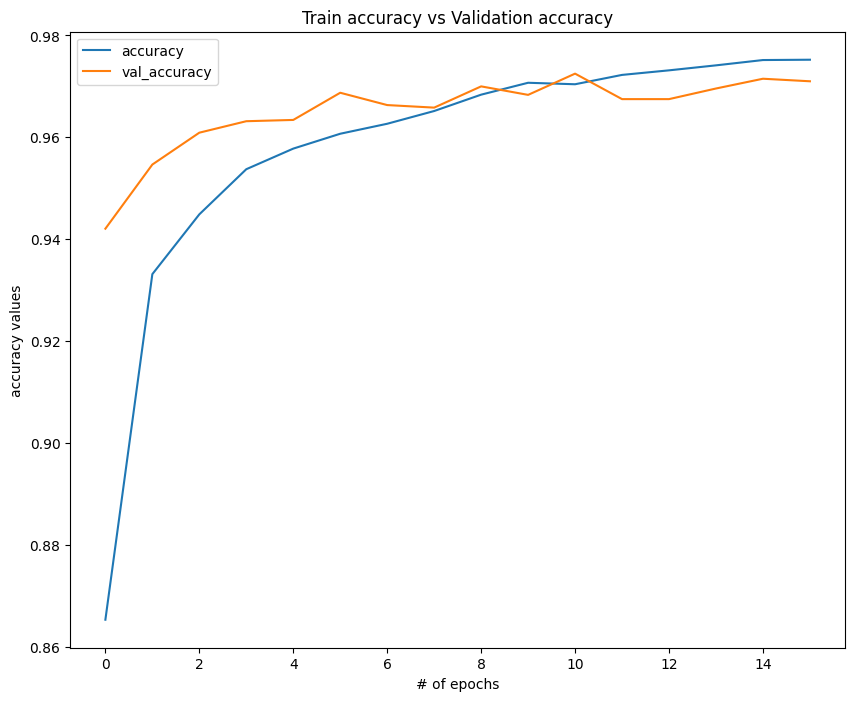

In [25]:
plt.figure(figsize=(10,8))
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.xlabel("# of epochs")
plt.ylabel('accuracy values')
plt.title("Train accuracy vs Validation accuracy")
plt.legend()
plt.show()

In [26]:
pred = model.predict(X_test)
y_pred = pred.argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


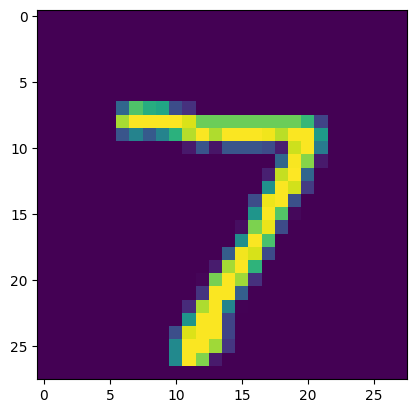

In [17]:
plt.imshow(X_test[0])

In [18]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 33ms/step


array([7])

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score

score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)

0.9707
[[ 966    0    2    0    0    2    4    2    3    1]
 [   0 1119    4    1    0    1    4    1    5    0]
 [   2    1 1006    7    1    1    4    5    5    0]
 [   0    0    9  972    1   10    0    9    7    2]
 [   0    0    4    1  959    0    7    3    1    7]
 [   2    0    0   15    1  853   13    2    4    2]
 [   2    3    0    0    6    3  942    0    2    0]
 [   0    2   11    2    2    0    1 1002    0    8]
 [   2    2    3    9    6    4    3    9  932    4]
 [   2    1    0    8   28    2    1    5    6  956]]


In [ ]:
#